In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [66]:
data = pd.read_csv('Hyderabad.csv')
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
target = data['Price']
data.drop(columns='Price', inplace=True)

In [68]:
loc_asc_freq_sorted = data['Location'] \
                                       .value_counts() \
                                       .sort_values() \
                                       .index
loc_to_int = dict(zip(
    loc_asc_freq_sorted,
    range(len(loc_asc_freq_sorted))
))
data['Location'] = data['Location'].map(loc_to_int)
data.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,1340,239,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,3498,237,4,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1318,240,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1295,214,3,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1145,242,2,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [69]:
model = LinearRegression()
model.fit(data, target)

LinearRegression()

In [70]:
def rmse(x, y):
    d = np.subtract(x, y)
    return np.sqrt(np.dot(d, d) / len(d))

prediction = model.predict(data)
error = rmse(prediction, target)
print(f'final rmse = {error:.2f}')

final rmse = 4736086.69


In [71]:
coefs = list(zip(
    data.columns,
    model.coef_
))
coefs.sort(key=lambda t: abs(t[1]))
coefs

[('Location', 4549.228335953943),
 ('Area', 10498.341230711958),
 ('ShoppingMall', 17328.86753462739),
 ('WashingMachine', -22037.91338369912),
 ('StaffQuarter', 24392.894653474425),
 ('Intercom', -95145.63645184487),
 ('Hospital', 203052.41249417362),
 ('VaastuCompliant', -211176.5964013929),
 ('Refrigerator', 322572.9301573921),
 ('JoggingTrack', -331154.2986760759),
 ("Children'splayarea", 338826.48639024934),
 ('MultipurposeRoom', 365137.7584335405),
 ('DiningTable', 377819.3057300705),
 ('Wardrobe', -451948.86413542024),
 ('LiftAvailable', -463779.7343857081),
 ('ATM', 472976.71737493586),
 ('Wifi', 478120.02753985807),
 ('RainWaterHarvesting', -548614.9625083063),
 ('BED', 607702.3430607065),
 ('PowerBackup', 630739.5047393205),
 ('SwimmingPool', 653158.6035017543),
 ('Gasconnection', 674232.0923674083),
 ('SportsFacility', -678621.6240665934),
 ('CarParking', 693859.179662666),
 ('School', -705251.3010518252),
 ('IndoorGames', 714299.238808672),
 ('ClubHouse', 741197.7958375361)

In [72]:
data1 = data[['Area', 'No. of Bedrooms']]
model1 = LinearRegression()
model1.fit(data1, target)
prediction1 = model1.predict(data1)
error1 = rmse(prediction1, target)
print(f'final rmse = {error1:.2f}')

house = pd.DataFrame({
    'Area': [1_000],
    'No. of Bedrooms': [3]
})
result = model1.predict(house)[0]
print(f'result = {result:.2f}')

final rmse = 4862672.36
result = 2250020.43


In [73]:
data2 = data[['Area']]
model2 = LinearRegression()
model2.fit(data2, target)
prediction2 = model2.predict(data2)
error2 = rmse(prediction2, target)
print(f'final rmse = {error2:.2f}')

slope = model2.coef_[0]
y_intercept = model2.intercept_
print(f'slope = {slope:.2f}')
print(f'y-intercept = {y_intercept:.2f}')

final rmse = 4903580.54
slope = 9753.94
y-intercept = -6222669.08


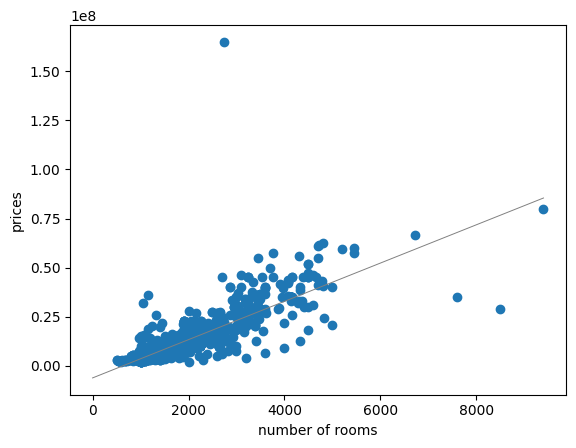

In [74]:
from utils import *

plot_points(data['Area'], target)
draw_line(slope, y_intercept, starting=0, ending=max(data['Area']))
plt.show()